## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.606
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              3178.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:44:24   Log-Likelihood:                         -15693.
No. Observations:               16512   AIC:                                  3.140e+04
Df Residuals:                   16504   BIC:                                  3.146e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

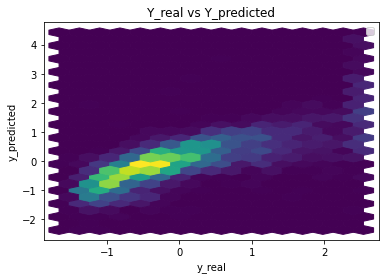

Performance Metrics
Mean Squared Error: 0.4030770549782633
Mean Absolute Error: 0.46536571946778416
Manhattan distance: 1921.0296899630137
Euclidean distance: 40.790955896500805


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3808290092951586


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9641567	total: 60.6ms	remaining: 1m
1:	learn: 0.9326599	total: 63.2ms	remaining: 31.5s
2:	learn: 0.9025054	total: 65.7ms	remaining: 21.8s
3:	learn: 0.8745927	total: 68.8ms	remaining: 17.1s
4:	learn: 0.8485334	total: 71ms	remaining: 14.1s
5:	learn: 0.8251301	total: 73.6ms	remaining: 12.2s
6:	learn: 0.8041276	total: 76.4ms	remaining: 10.8s
7:	learn: 0.7841897	total: 79.3ms	remaining: 9.84s
8:	learn: 0.7658970	total: 81.7ms	remaining: 8.99s
9:	learn: 0.7472011	total: 84.4ms	remaining: 8.36s
10:	learn: 0.7309346	total: 86.9ms	remaining: 7.81s
11:	learn: 0.7158002	total: 89.4ms	remaining: 7.36s
12:	learn: 0.7016122	total: 91.8ms	remaining: 6.97s
13:	learn: 0.6893183	total: 94.3ms	remaining: 6.64s
14:	learn: 0.6777268	total: 96.8ms	remaining: 6.35s
15:	learn: 0.6658879	total: 99.1ms	remaining: 6.1s
16:	learn: 0.6560037	total: 101ms	remaining: 5.86s
17:	learn: 0.6463878	total: 104ms	remaining: 5.66s
18:	learn: 0.6379672	total: 106ms	remaining: 5.48s
1

27:	learn: 0.5717360	total: 128ms	remaining: 4.46s
28:	learn: 0.5665771	total: 131ms	remaining: 4.38s
29:	learn: 0.5623374	total: 133ms	remaining: 4.31s
30:	learn: 0.5589081	total: 136ms	remaining: 4.24s
31:	learn: 0.5554991	total: 138ms	remaining: 4.18s
32:	learn: 0.5519721	total: 141ms	remaining: 4.12s
33:	learn: 0.5473366	total: 144ms	remaining: 4.08s
34:	learn: 0.5432249	total: 146ms	remaining: 4.02s
35:	learn: 0.5400938	total: 148ms	remaining: 3.96s
36:	learn: 0.5371725	total: 150ms	remaining: 3.91s
37:	learn: 0.5343731	total: 153ms	remaining: 3.87s
38:	learn: 0.5309193	total: 155ms	remaining: 3.83s
39:	learn: 0.5277761	total: 158ms	remaining: 3.79s
40:	learn: 0.5252912	total: 161ms	remaining: 3.76s
41:	learn: 0.5233466	total: 163ms	remaining: 3.72s
42:	learn: 0.5205829	total: 166ms	remaining: 3.69s
43:	learn: 0.5184010	total: 169ms	remaining: 3.66s
44:	learn: 0.5166201	total: 171ms	remaining: 3.62s
45:	learn: 0.5145934	total: 173ms	remaining: 3.59s
46:	learn: 0.5112749	total: 175

55:	learn: 0.4930076	total: 196ms	remaining: 3.31s
56:	learn: 0.4917235	total: 199ms	remaining: 3.29s
57:	learn: 0.4908449	total: 201ms	remaining: 3.27s
58:	learn: 0.4897586	total: 204ms	remaining: 3.25s
59:	learn: 0.4886228	total: 206ms	remaining: 3.23s
60:	learn: 0.4874827	total: 209ms	remaining: 3.21s
61:	learn: 0.4857389	total: 211ms	remaining: 3.19s
62:	learn: 0.4845402	total: 213ms	remaining: 3.17s
63:	learn: 0.4824836	total: 215ms	remaining: 3.15s
64:	learn: 0.4815596	total: 218ms	remaining: 3.13s
65:	learn: 0.4801990	total: 220ms	remaining: 3.12s
66:	learn: 0.4789990	total: 223ms	remaining: 3.1s
67:	learn: 0.4777836	total: 225ms	remaining: 3.08s
68:	learn: 0.4770312	total: 227ms	remaining: 3.06s
69:	learn: 0.4760704	total: 229ms	remaining: 3.05s
70:	learn: 0.4754796	total: 232ms	remaining: 3.03s
71:	learn: 0.4734399	total: 234ms	remaining: 3.02s
72:	learn: 0.4720468	total: 237ms	remaining: 3s
73:	learn: 0.4712293	total: 239ms	remaining: 2.99s
74:	learn: 0.4704591	total: 242ms	r

108:	learn: 0.4452352	total: 324ms	remaining: 2.64s
109:	learn: 0.4446104	total: 326ms	remaining: 2.64s
110:	learn: 0.4441953	total: 328ms	remaining: 2.63s
111:	learn: 0.4437762	total: 331ms	remaining: 2.62s
112:	learn: 0.4431986	total: 333ms	remaining: 2.62s
113:	learn: 0.4425063	total: 336ms	remaining: 2.61s
114:	learn: 0.4418806	total: 338ms	remaining: 2.6s
115:	learn: 0.4416214	total: 340ms	remaining: 2.59s
116:	learn: 0.4414027	total: 343ms	remaining: 2.59s
117:	learn: 0.4409427	total: 345ms	remaining: 2.58s
118:	learn: 0.4404127	total: 349ms	remaining: 2.58s
119:	learn: 0.4397261	total: 351ms	remaining: 2.57s
120:	learn: 0.4392243	total: 353ms	remaining: 2.56s
121:	learn: 0.4389660	total: 356ms	remaining: 2.56s
122:	learn: 0.4385349	total: 358ms	remaining: 2.55s
123:	learn: 0.4379809	total: 360ms	remaining: 2.55s
124:	learn: 0.4375527	total: 363ms	remaining: 2.54s
125:	learn: 0.4370574	total: 365ms	remaining: 2.53s
126:	learn: 0.4364352	total: 368ms	remaining: 2.53s
127:	learn: 0

136:	learn: 0.4315174	total: 392ms	remaining: 2.47s
137:	learn: 0.4310999	total: 395ms	remaining: 2.46s
138:	learn: 0.4304743	total: 397ms	remaining: 2.46s
139:	learn: 0.4299181	total: 399ms	remaining: 2.45s
140:	learn: 0.4293677	total: 402ms	remaining: 2.45s
141:	learn: 0.4290264	total: 404ms	remaining: 2.44s
142:	learn: 0.4286464	total: 407ms	remaining: 2.44s
143:	learn: 0.4280664	total: 410ms	remaining: 2.43s
144:	learn: 0.4276715	total: 412ms	remaining: 2.43s
145:	learn: 0.4272189	total: 414ms	remaining: 2.42s
146:	learn: 0.4268743	total: 417ms	remaining: 2.42s
147:	learn: 0.4263152	total: 420ms	remaining: 2.42s
148:	learn: 0.4256465	total: 422ms	remaining: 2.41s
149:	learn: 0.4253234	total: 425ms	remaining: 2.41s
150:	learn: 0.4248376	total: 427ms	remaining: 2.4s
151:	learn: 0.4243077	total: 430ms	remaining: 2.4s
152:	learn: 0.4237662	total: 432ms	remaining: 2.39s
153:	learn: 0.4234533	total: 435ms	remaining: 2.39s
154:	learn: 0.4230300	total: 437ms	remaining: 2.38s
155:	learn: 0.

187:	learn: 0.4094061	total: 519ms	remaining: 2.24s
188:	learn: 0.4090272	total: 522ms	remaining: 2.24s
189:	learn: 0.4085764	total: 524ms	remaining: 2.23s
190:	learn: 0.4082650	total: 526ms	remaining: 2.23s
191:	learn: 0.4080295	total: 528ms	remaining: 2.22s
192:	learn: 0.4076249	total: 530ms	remaining: 2.22s
193:	learn: 0.4073240	total: 533ms	remaining: 2.21s
194:	learn: 0.4069948	total: 535ms	remaining: 2.21s
195:	learn: 0.4066098	total: 538ms	remaining: 2.2s
196:	learn: 0.4062335	total: 540ms	remaining: 2.2s
197:	learn: 0.4058634	total: 542ms	remaining: 2.19s
198:	learn: 0.4055764	total: 544ms	remaining: 2.19s
199:	learn: 0.4051714	total: 546ms	remaining: 2.19s
200:	learn: 0.4049497	total: 549ms	remaining: 2.18s
201:	learn: 0.4046577	total: 551ms	remaining: 2.18s
202:	learn: 0.4043784	total: 553ms	remaining: 2.17s
203:	learn: 0.4041244	total: 556ms	remaining: 2.17s
204:	learn: 0.4038556	total: 558ms	remaining: 2.16s
205:	learn: 0.4034885	total: 560ms	remaining: 2.16s
206:	learn: 0.

217:	learn: 0.3996774	total: 589ms	remaining: 2.11s
218:	learn: 0.3994568	total: 592ms	remaining: 2.11s
219:	learn: 0.3991234	total: 594ms	remaining: 2.11s
220:	learn: 0.3986860	total: 597ms	remaining: 2.1s
221:	learn: 0.3983369	total: 599ms	remaining: 2.1s
222:	learn: 0.3980297	total: 601ms	remaining: 2.1s
223:	learn: 0.3976498	total: 604ms	remaining: 2.09s
224:	learn: 0.3973810	total: 607ms	remaining: 2.09s
225:	learn: 0.3971047	total: 609ms	remaining: 2.08s
226:	learn: 0.3967956	total: 611ms	remaining: 2.08s
227:	learn: 0.3965843	total: 614ms	remaining: 2.08s
228:	learn: 0.3962373	total: 616ms	remaining: 2.07s
229:	learn: 0.3959779	total: 618ms	remaining: 2.07s
230:	learn: 0.3955825	total: 621ms	remaining: 2.07s
231:	learn: 0.3953720	total: 623ms	remaining: 2.06s
232:	learn: 0.3951600	total: 625ms	remaining: 2.06s
233:	learn: 0.3949000	total: 628ms	remaining: 2.05s
234:	learn: 0.3945664	total: 630ms	remaining: 2.05s
235:	learn: 0.3943852	total: 633ms	remaining: 2.05s
236:	learn: 0.3

270:	learn: 0.3849282	total: 715ms	remaining: 1.92s
271:	learn: 0.3847040	total: 718ms	remaining: 1.92s
272:	learn: 0.3844607	total: 720ms	remaining: 1.92s
273:	learn: 0.3843424	total: 722ms	remaining: 1.91s
274:	learn: 0.3841273	total: 725ms	remaining: 1.91s
275:	learn: 0.3838723	total: 727ms	remaining: 1.91s
276:	learn: 0.3835944	total: 730ms	remaining: 1.9s
277:	learn: 0.3833096	total: 732ms	remaining: 1.9s
278:	learn: 0.3831712	total: 734ms	remaining: 1.9s
279:	learn: 0.3829974	total: 737ms	remaining: 1.9s
280:	learn: 0.3825654	total: 739ms	remaining: 1.89s
281:	learn: 0.3824104	total: 742ms	remaining: 1.89s
282:	learn: 0.3822119	total: 744ms	remaining: 1.88s
283:	learn: 0.3820513	total: 747ms	remaining: 1.88s
284:	learn: 0.3818735	total: 749ms	remaining: 1.88s
285:	learn: 0.3816659	total: 752ms	remaining: 1.88s
286:	learn: 0.3814501	total: 754ms	remaining: 1.87s
287:	learn: 0.3813109	total: 758ms	remaining: 1.87s
288:	learn: 0.3811266	total: 761ms	remaining: 1.87s
289:	learn: 0.38

298:	learn: 0.3786211	total: 785ms	remaining: 1.84s
299:	learn: 0.3784547	total: 787ms	remaining: 1.84s
300:	learn: 0.3782248	total: 790ms	remaining: 1.83s
301:	learn: 0.3778641	total: 792ms	remaining: 1.83s
302:	learn: 0.3777269	total: 795ms	remaining: 1.83s
303:	learn: 0.3775540	total: 797ms	remaining: 1.82s
304:	learn: 0.3773324	total: 799ms	remaining: 1.82s
305:	learn: 0.3772138	total: 802ms	remaining: 1.82s
306:	learn: 0.3770784	total: 804ms	remaining: 1.81s
307:	learn: 0.3767767	total: 806ms	remaining: 1.81s
308:	learn: 0.3764965	total: 809ms	remaining: 1.81s
309:	learn: 0.3763378	total: 811ms	remaining: 1.8s
310:	learn: 0.3762204	total: 814ms	remaining: 1.8s
311:	learn: 0.3759501	total: 816ms	remaining: 1.8s
312:	learn: 0.3757922	total: 818ms	remaining: 1.79s
313:	learn: 0.3756546	total: 821ms	remaining: 1.79s
314:	learn: 0.3753848	total: 823ms	remaining: 1.79s
315:	learn: 0.3752310	total: 826ms	remaining: 1.79s
316:	learn: 0.3750592	total: 828ms	remaining: 1.78s
317:	learn: 0.3

350:	learn: 0.3681550	total: 911ms	remaining: 1.69s
351:	learn: 0.3680923	total: 914ms	remaining: 1.68s
352:	learn: 0.3678691	total: 917ms	remaining: 1.68s
353:	learn: 0.3676477	total: 919ms	remaining: 1.68s
354:	learn: 0.3675267	total: 922ms	remaining: 1.67s
355:	learn: 0.3673851	total: 924ms	remaining: 1.67s
356:	learn: 0.3672070	total: 926ms	remaining: 1.67s
357:	learn: 0.3670357	total: 929ms	remaining: 1.67s
358:	learn: 0.3668360	total: 931ms	remaining: 1.66s
359:	learn: 0.3665855	total: 934ms	remaining: 1.66s
360:	learn: 0.3663930	total: 937ms	remaining: 1.66s
361:	learn: 0.3662004	total: 939ms	remaining: 1.66s
362:	learn: 0.3659874	total: 942ms	remaining: 1.65s
363:	learn: 0.3658042	total: 944ms	remaining: 1.65s
364:	learn: 0.3655895	total: 946ms	remaining: 1.65s
365:	learn: 0.3653991	total: 949ms	remaining: 1.64s
366:	learn: 0.3653284	total: 951ms	remaining: 1.64s
367:	learn: 0.3651223	total: 954ms	remaining: 1.64s
368:	learn: 0.3649100	total: 956ms	remaining: 1.64s
369:	learn: 

378:	learn: 0.3631072	total: 981ms	remaining: 1.61s
379:	learn: 0.3627499	total: 983ms	remaining: 1.6s
380:	learn: 0.3625593	total: 986ms	remaining: 1.6s
381:	learn: 0.3623361	total: 988ms	remaining: 1.6s
382:	learn: 0.3620250	total: 991ms	remaining: 1.6s
383:	learn: 0.3618429	total: 993ms	remaining: 1.59s
384:	learn: 0.3617099	total: 995ms	remaining: 1.59s
385:	learn: 0.3615503	total: 998ms	remaining: 1.59s
386:	learn: 0.3613092	total: 1s	remaining: 1.58s
387:	learn: 0.3611229	total: 1s	remaining: 1.58s
388:	learn: 0.3609110	total: 1s	remaining: 1.58s
389:	learn: 0.3607832	total: 1.01s	remaining: 1.57s
390:	learn: 0.3606067	total: 1.01s	remaining: 1.57s
391:	learn: 0.3603771	total: 1.01s	remaining: 1.57s
392:	learn: 0.3602396	total: 1.01s	remaining: 1.57s
393:	learn: 0.3600889	total: 1.02s	remaining: 1.56s
394:	learn: 0.3599610	total: 1.02s	remaining: 1.56s
395:	learn: 0.3598619	total: 1.02s	remaining: 1.56s
396:	learn: 0.3597732	total: 1.02s	remaining: 1.56s
397:	learn: 0.3595718	tot

431:	learn: 0.3542246	total: 1.11s	remaining: 1.46s
432:	learn: 0.3540858	total: 1.11s	remaining: 1.45s
433:	learn: 0.3539551	total: 1.11s	remaining: 1.45s
434:	learn: 0.3537970	total: 1.11s	remaining: 1.45s
435:	learn: 0.3536091	total: 1.12s	remaining: 1.45s
436:	learn: 0.3534818	total: 1.12s	remaining: 1.44s
437:	learn: 0.3533010	total: 1.12s	remaining: 1.44s
438:	learn: 0.3531684	total: 1.13s	remaining: 1.44s
439:	learn: 0.3530089	total: 1.13s	remaining: 1.44s
440:	learn: 0.3529158	total: 1.13s	remaining: 1.43s
441:	learn: 0.3527364	total: 1.13s	remaining: 1.43s
442:	learn: 0.3525920	total: 1.14s	remaining: 1.43s
443:	learn: 0.3523818	total: 1.14s	remaining: 1.43s
444:	learn: 0.3522449	total: 1.14s	remaining: 1.42s
445:	learn: 0.3521108	total: 1.14s	remaining: 1.42s
446:	learn: 0.3520045	total: 1.15s	remaining: 1.42s
447:	learn: 0.3518517	total: 1.15s	remaining: 1.41s
448:	learn: 0.3517514	total: 1.15s	remaining: 1.41s
449:	learn: 0.3515654	total: 1.15s	remaining: 1.41s
450:	learn: 

459:	learn: 0.3502418	total: 1.18s	remaining: 1.38s
460:	learn: 0.3500975	total: 1.18s	remaining: 1.38s
461:	learn: 0.3499299	total: 1.18s	remaining: 1.38s
462:	learn: 0.3496400	total: 1.18s	remaining: 1.37s
463:	learn: 0.3495482	total: 1.19s	remaining: 1.37s
464:	learn: 0.3493988	total: 1.19s	remaining: 1.37s
465:	learn: 0.3492964	total: 1.19s	remaining: 1.36s
466:	learn: 0.3490948	total: 1.19s	remaining: 1.36s
467:	learn: 0.3490059	total: 1.2s	remaining: 1.36s
468:	learn: 0.3488753	total: 1.2s	remaining: 1.36s
469:	learn: 0.3487409	total: 1.2s	remaining: 1.35s
470:	learn: 0.3485435	total: 1.2s	remaining: 1.35s
471:	learn: 0.3483559	total: 1.21s	remaining: 1.35s
472:	learn: 0.3482108	total: 1.21s	remaining: 1.35s
473:	learn: 0.3480698	total: 1.21s	remaining: 1.34s
474:	learn: 0.3479146	total: 1.21s	remaining: 1.34s
475:	learn: 0.3477650	total: 1.22s	remaining: 1.34s
476:	learn: 0.3476564	total: 1.22s	remaining: 1.34s
477:	learn: 0.3474726	total: 1.22s	remaining: 1.33s
478:	learn: 0.34

504:	learn: 0.3429685	total: 1.3s	remaining: 1.28s
505:	learn: 0.3428433	total: 1.31s	remaining: 1.28s
506:	learn: 0.3427140	total: 1.31s	remaining: 1.27s
507:	learn: 0.3425952	total: 1.31s	remaining: 1.27s
508:	learn: 0.3424241	total: 1.31s	remaining: 1.27s
509:	learn: 0.3422966	total: 1.32s	remaining: 1.26s
510:	learn: 0.3421880	total: 1.32s	remaining: 1.26s
511:	learn: 0.3420770	total: 1.32s	remaining: 1.26s
512:	learn: 0.3419968	total: 1.32s	remaining: 1.26s
513:	learn: 0.3418684	total: 1.33s	remaining: 1.25s
514:	learn: 0.3417646	total: 1.33s	remaining: 1.25s
515:	learn: 0.3416572	total: 1.33s	remaining: 1.25s
516:	learn: 0.3415642	total: 1.33s	remaining: 1.25s
517:	learn: 0.3414652	total: 1.34s	remaining: 1.24s
518:	learn: 0.3413087	total: 1.34s	remaining: 1.24s
519:	learn: 0.3411695	total: 1.34s	remaining: 1.24s
520:	learn: 0.3409758	total: 1.34s	remaining: 1.24s
521:	learn: 0.3408589	total: 1.35s	remaining: 1.23s
522:	learn: 0.3407198	total: 1.35s	remaining: 1.23s
523:	learn: 0

532:	learn: 0.3394051	total: 1.37s	remaining: 1.2s
533:	learn: 0.3392918	total: 1.38s	remaining: 1.2s
534:	learn: 0.3391681	total: 1.38s	remaining: 1.2s
535:	learn: 0.3389440	total: 1.38s	remaining: 1.2s
536:	learn: 0.3386226	total: 1.38s	remaining: 1.19s
537:	learn: 0.3385275	total: 1.39s	remaining: 1.19s
538:	learn: 0.3383921	total: 1.39s	remaining: 1.19s
539:	learn: 0.3382846	total: 1.39s	remaining: 1.19s
540:	learn: 0.3379942	total: 1.39s	remaining: 1.18s
541:	learn: 0.3379227	total: 1.4s	remaining: 1.18s
542:	learn: 0.3377807	total: 1.4s	remaining: 1.18s
543:	learn: 0.3376522	total: 1.4s	remaining: 1.17s
544:	learn: 0.3375434	total: 1.4s	remaining: 1.17s
545:	learn: 0.3374630	total: 1.41s	remaining: 1.17s
546:	learn: 0.3373427	total: 1.41s	remaining: 1.17s
547:	learn: 0.3371462	total: 1.41s	remaining: 1.17s
548:	learn: 0.3370603	total: 1.42s	remaining: 1.16s
549:	learn: 0.3369792	total: 1.42s	remaining: 1.16s
550:	learn: 0.3368540	total: 1.42s	remaining: 1.16s
551:	learn: 0.336768

584:	learn: 0.3326102	total: 1.5s	remaining: 1.06s
585:	learn: 0.3324998	total: 1.5s	remaining: 1.06s
586:	learn: 0.3324252	total: 1.51s	remaining: 1.06s
587:	learn: 0.3322917	total: 1.51s	remaining: 1.06s
588:	learn: 0.3322097	total: 1.51s	remaining: 1.05s
589:	learn: 0.3320486	total: 1.51s	remaining: 1.05s
590:	learn: 0.3319485	total: 1.51s	remaining: 1.05s
591:	learn: 0.3318622	total: 1.52s	remaining: 1.05s
592:	learn: 0.3317518	total: 1.52s	remaining: 1.04s
593:	learn: 0.3316453	total: 1.52s	remaining: 1.04s
594:	learn: 0.3315682	total: 1.53s	remaining: 1.04s
595:	learn: 0.3314580	total: 1.53s	remaining: 1.04s
596:	learn: 0.3313304	total: 1.53s	remaining: 1.03s
597:	learn: 0.3312017	total: 1.53s	remaining: 1.03s
598:	learn: 0.3311193	total: 1.53s	remaining: 1.03s
599:	learn: 0.3310200	total: 1.54s	remaining: 1.02s
600:	learn: 0.3309180	total: 1.54s	remaining: 1.02s
601:	learn: 0.3308429	total: 1.54s	remaining: 1.02s
602:	learn: 0.3307391	total: 1.55s	remaining: 1.02s
603:	learn: 0.

612:	learn: 0.3295040	total: 1.57s	remaining: 991ms
613:	learn: 0.3293747	total: 1.57s	remaining: 988ms
614:	learn: 0.3293178	total: 1.57s	remaining: 986ms
615:	learn: 0.3291830	total: 1.58s	remaining: 983ms
616:	learn: 0.3290485	total: 1.58s	remaining: 981ms
617:	learn: 0.3289060	total: 1.58s	remaining: 978ms
618:	learn: 0.3286470	total: 1.58s	remaining: 975ms
619:	learn: 0.3285676	total: 1.59s	remaining: 973ms
620:	learn: 0.3283661	total: 1.59s	remaining: 970ms
621:	learn: 0.3282449	total: 1.59s	remaining: 968ms
622:	learn: 0.3281334	total: 1.59s	remaining: 965ms
623:	learn: 0.3280002	total: 1.6s	remaining: 962ms
624:	learn: 0.3278504	total: 1.6s	remaining: 960ms
625:	learn: 0.3276862	total: 1.6s	remaining: 957ms
626:	learn: 0.3276207	total: 1.6s	remaining: 954ms
627:	learn: 0.3274585	total: 1.61s	remaining: 952ms
628:	learn: 0.3273244	total: 1.61s	remaining: 949ms
629:	learn: 0.3272291	total: 1.61s	remaining: 946ms
630:	learn: 0.3271140	total: 1.61s	remaining: 944ms
631:	learn: 0.32

666:	learn: 0.3231695	total: 1.7s	remaining: 848ms
667:	learn: 0.3230865	total: 1.7s	remaining: 845ms
668:	learn: 0.3230330	total: 1.7s	remaining: 843ms
669:	learn: 0.3229183	total: 1.71s	remaining: 840ms
670:	learn: 0.3227602	total: 1.71s	remaining: 837ms
671:	learn: 0.3226629	total: 1.71s	remaining: 835ms
672:	learn: 0.3225538	total: 1.71s	remaining: 832ms
673:	learn: 0.3224964	total: 1.71s	remaining: 829ms
674:	learn: 0.3224121	total: 1.72s	remaining: 827ms
675:	learn: 0.3223265	total: 1.72s	remaining: 824ms
676:	learn: 0.3222362	total: 1.72s	remaining: 821ms
677:	learn: 0.3221996	total: 1.72s	remaining: 819ms
678:	learn: 0.3220850	total: 1.73s	remaining: 816ms
679:	learn: 0.3219951	total: 1.73s	remaining: 814ms
680:	learn: 0.3218611	total: 1.73s	remaining: 811ms
681:	learn: 0.3217786	total: 1.73s	remaining: 809ms
682:	learn: 0.3216393	total: 1.74s	remaining: 806ms
683:	learn: 0.3215152	total: 1.74s	remaining: 804ms
684:	learn: 0.3214071	total: 1.74s	remaining: 801ms
685:	learn: 0.3

694:	learn: 0.3205140	total: 1.76s	remaining: 775ms
695:	learn: 0.3204732	total: 1.77s	remaining: 772ms
696:	learn: 0.3203515	total: 1.77s	remaining: 769ms
697:	learn: 0.3202478	total: 1.77s	remaining: 767ms
698:	learn: 0.3201830	total: 1.77s	remaining: 764ms
699:	learn: 0.3200817	total: 1.78s	remaining: 762ms
700:	learn: 0.3199815	total: 1.78s	remaining: 759ms
701:	learn: 0.3198271	total: 1.78s	remaining: 756ms
702:	learn: 0.3197068	total: 1.78s	remaining: 754ms
703:	learn: 0.3196008	total: 1.79s	remaining: 751ms
704:	learn: 0.3194881	total: 1.79s	remaining: 748ms
705:	learn: 0.3194033	total: 1.79s	remaining: 746ms
706:	learn: 0.3192977	total: 1.79s	remaining: 743ms
707:	learn: 0.3192362	total: 1.79s	remaining: 741ms
708:	learn: 0.3190938	total: 1.8s	remaining: 738ms
709:	learn: 0.3190318	total: 1.8s	remaining: 735ms
710:	learn: 0.3189367	total: 1.8s	remaining: 733ms
711:	learn: 0.3188375	total: 1.8s	remaining: 730ms
712:	learn: 0.3187813	total: 1.81s	remaining: 727ms
713:	learn: 0.31

747:	learn: 0.3153612	total: 1.89s	remaining: 638ms
748:	learn: 0.3152367	total: 1.9s	remaining: 636ms
749:	learn: 0.3151485	total: 1.9s	remaining: 633ms
750:	learn: 0.3150612	total: 1.9s	remaining: 631ms
751:	learn: 0.3149738	total: 1.9s	remaining: 628ms
752:	learn: 0.3149147	total: 1.91s	remaining: 625ms
753:	learn: 0.3147920	total: 1.91s	remaining: 623ms
754:	learn: 0.3146997	total: 1.91s	remaining: 620ms
755:	learn: 0.3146431	total: 1.91s	remaining: 618ms
756:	learn: 0.3145633	total: 1.92s	remaining: 615ms
757:	learn: 0.3144763	total: 1.92s	remaining: 612ms
758:	learn: 0.3144087	total: 1.92s	remaining: 610ms
759:	learn: 0.3143540	total: 1.92s	remaining: 607ms
760:	learn: 0.3142655	total: 1.92s	remaining: 604ms
761:	learn: 0.3141936	total: 1.93s	remaining: 602ms
762:	learn: 0.3141537	total: 1.93s	remaining: 599ms
763:	learn: 0.3140889	total: 1.93s	remaining: 597ms
764:	learn: 0.3140425	total: 1.93s	remaining: 594ms
765:	learn: 0.3139138	total: 1.94s	remaining: 592ms
766:	learn: 0.31

776:	learn: 0.3129382	total: 1.96s	remaining: 563ms
777:	learn: 0.3128393	total: 1.97s	remaining: 561ms
778:	learn: 0.3127198	total: 1.97s	remaining: 558ms
779:	learn: 0.3126829	total: 1.97s	remaining: 556ms
780:	learn: 0.3125757	total: 1.97s	remaining: 553ms
781:	learn: 0.3124813	total: 1.97s	remaining: 551ms
782:	learn: 0.3123238	total: 1.98s	remaining: 548ms
783:	learn: 0.3121702	total: 1.98s	remaining: 545ms
784:	learn: 0.3120637	total: 1.98s	remaining: 543ms
785:	learn: 0.3120022	total: 1.98s	remaining: 540ms
786:	learn: 0.3119091	total: 1.99s	remaining: 538ms
787:	learn: 0.3118408	total: 1.99s	remaining: 535ms
788:	learn: 0.3117775	total: 1.99s	remaining: 532ms
789:	learn: 0.3117094	total: 1.99s	remaining: 530ms
790:	learn: 0.3115968	total: 2s	remaining: 527ms
791:	learn: 0.3114802	total: 2s	remaining: 525ms
792:	learn: 0.3113948	total: 2s	remaining: 522ms
793:	learn: 0.3113437	total: 2s	remaining: 520ms
794:	learn: 0.3112438	total: 2s	remaining: 517ms
795:	learn: 0.3111972	total

828:	learn: 0.3086095	total: 2.09s	remaining: 431ms
829:	learn: 0.3085029	total: 2.09s	remaining: 428ms
830:	learn: 0.3083931	total: 2.09s	remaining: 426ms
831:	learn: 0.3083172	total: 2.1s	remaining: 423ms
832:	learn: 0.3082598	total: 2.1s	remaining: 421ms
833:	learn: 0.3081353	total: 2.1s	remaining: 418ms
834:	learn: 0.3080500	total: 2.1s	remaining: 416ms
835:	learn: 0.3079799	total: 2.11s	remaining: 413ms
836:	learn: 0.3078861	total: 2.11s	remaining: 411ms
837:	learn: 0.3077691	total: 2.11s	remaining: 408ms
838:	learn: 0.3076787	total: 2.11s	remaining: 406ms
839:	learn: 0.3076011	total: 2.12s	remaining: 403ms
840:	learn: 0.3075291	total: 2.12s	remaining: 401ms
841:	learn: 0.3073417	total: 2.12s	remaining: 398ms
842:	learn: 0.3072388	total: 2.12s	remaining: 396ms
843:	learn: 0.3071802	total: 2.13s	remaining: 393ms
844:	learn: 0.3071088	total: 2.13s	remaining: 390ms
845:	learn: 0.3070232	total: 2.13s	remaining: 388ms
846:	learn: 0.3069306	total: 2.13s	remaining: 385ms
847:	learn: 0.30

856:	learn: 0.3060861	total: 2.16s	remaining: 360ms
857:	learn: 0.3060064	total: 2.16s	remaining: 357ms
858:	learn: 0.3059447	total: 2.16s	remaining: 355ms
859:	learn: 0.3058730	total: 2.16s	remaining: 352ms
860:	learn: 0.3057691	total: 2.17s	remaining: 350ms
861:	learn: 0.3056904	total: 2.17s	remaining: 347ms
862:	learn: 0.3056110	total: 2.17s	remaining: 345ms
863:	learn: 0.3055685	total: 2.17s	remaining: 342ms
864:	learn: 0.3054847	total: 2.18s	remaining: 340ms
865:	learn: 0.3054023	total: 2.18s	remaining: 337ms
866:	learn: 0.3052794	total: 2.18s	remaining: 335ms
867:	learn: 0.3051423	total: 2.18s	remaining: 332ms
868:	learn: 0.3050855	total: 2.19s	remaining: 330ms
869:	learn: 0.3049989	total: 2.19s	remaining: 327ms
870:	learn: 0.3049201	total: 2.19s	remaining: 325ms
871:	learn: 0.3048248	total: 2.19s	remaining: 322ms
872:	learn: 0.3047332	total: 2.2s	remaining: 320ms
873:	learn: 0.3046567	total: 2.2s	remaining: 317ms
874:	learn: 0.3045883	total: 2.2s	remaining: 315ms
875:	learn: 0.3

908:	learn: 0.3017393	total: 2.29s	remaining: 229ms
909:	learn: 0.3016612	total: 2.29s	remaining: 226ms
910:	learn: 0.3015639	total: 2.29s	remaining: 224ms
911:	learn: 0.3014586	total: 2.29s	remaining: 221ms
912:	learn: 0.3013508	total: 2.3s	remaining: 219ms
913:	learn: 0.3012709	total: 2.3s	remaining: 216ms
914:	learn: 0.3012097	total: 2.3s	remaining: 214ms
915:	learn: 0.3011424	total: 2.3s	remaining: 211ms
916:	learn: 0.3010762	total: 2.31s	remaining: 209ms
917:	learn: 0.3009968	total: 2.31s	remaining: 206ms
918:	learn: 0.3009283	total: 2.31s	remaining: 204ms
919:	learn: 0.3008338	total: 2.31s	remaining: 201ms
920:	learn: 0.3007573	total: 2.31s	remaining: 199ms
921:	learn: 0.3006686	total: 2.32s	remaining: 196ms
922:	learn: 0.3006324	total: 2.32s	remaining: 194ms
923:	learn: 0.3004907	total: 2.32s	remaining: 191ms
924:	learn: 0.3004109	total: 2.32s	remaining: 188ms
925:	learn: 0.3002669	total: 2.33s	remaining: 186ms
926:	learn: 0.3001787	total: 2.33s	remaining: 183ms
927:	learn: 0.30

936:	learn: 0.2994856	total: 2.35s	remaining: 158ms
937:	learn: 0.2994188	total: 2.35s	remaining: 156ms
938:	learn: 0.2993684	total: 2.36s	remaining: 153ms
939:	learn: 0.2993044	total: 2.36s	remaining: 151ms
940:	learn: 0.2991901	total: 2.36s	remaining: 148ms
941:	learn: 0.2991068	total: 2.36s	remaining: 146ms
942:	learn: 0.2990627	total: 2.37s	remaining: 143ms
943:	learn: 0.2989744	total: 2.37s	remaining: 141ms
944:	learn: 0.2988893	total: 2.37s	remaining: 138ms
945:	learn: 0.2987853	total: 2.37s	remaining: 136ms
946:	learn: 0.2987357	total: 2.38s	remaining: 133ms
947:	learn: 0.2986444	total: 2.38s	remaining: 131ms
948:	learn: 0.2985693	total: 2.38s	remaining: 128ms
949:	learn: 0.2984929	total: 2.38s	remaining: 125ms
950:	learn: 0.2984109	total: 2.39s	remaining: 123ms
951:	learn: 0.2983618	total: 2.39s	remaining: 120ms
952:	learn: 0.2983183	total: 2.39s	remaining: 118ms
953:	learn: 0.2982583	total: 2.39s	remaining: 115ms
954:	learn: 0.2982022	total: 2.4s	remaining: 113ms
955:	learn: 0

990:	learn: 0.2954811	total: 2.48s	remaining: 22.5ms
991:	learn: 0.2954209	total: 2.48s	remaining: 20ms
992:	learn: 0.2953508	total: 2.49s	remaining: 17.5ms
993:	learn: 0.2952776	total: 2.49s	remaining: 15ms
994:	learn: 0.2951974	total: 2.49s	remaining: 12.5ms
995:	learn: 0.2951593	total: 2.49s	remaining: 10ms
996:	learn: 0.2950719	total: 2.5s	remaining: 7.51ms
997:	learn: 0.2949889	total: 2.5s	remaining: 5.01ms
998:	learn: 0.2949175	total: 2.5s	remaining: 2.5ms
999:	learn: 0.2948721	total: 2.5s	remaining: 0us
Mean Squared error 0.1456129148704217


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.0465059823455212
